# <center> Stock Prediction with LSTM <center>


In [82]:
!pip install keras
!pip install tensorflow
!pip install hmmlearn==0.1.1

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from pandas_datareader import data, wb
import datetime

In [130]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10

In [85]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2018-12-31')
traindf = data.DataReader('PYPL', 'yahoo', start, end)

In [86]:
start = pd.to_datetime('2019-01-01')
end = pd.to_datetime('2020-10-31')
testdf = data.DataReader('PYPL', 'yahoo', start, end)

In [87]:
traindf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-06,39.750000,36.000000,38.000000,36.709999,5866600,36.709999
2015-07-07,37.810001,36.000000,37.720001,36.619999,7359000,36.619999
2015-07-08,36.360001,34.529999,36.340000,34.700001,5387700,34.700001
2015-07-09,35.520000,33.990002,35.099998,34.500000,3760100,34.500000
2015-07-10,35.189999,33.980000,34.660000,34.689999,4472800,34.689999


In [88]:
traindf.isna().any()

High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [89]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 880 entries, 2015-07-06 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       880 non-null    float64
 1   Low        880 non-null    float64
 2   Open       880 non-null    float64
 3   Close      880 non-null    float64
 4   Volume     880 non-null    int64  
 5   Adj Close  880 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 48.1 KB


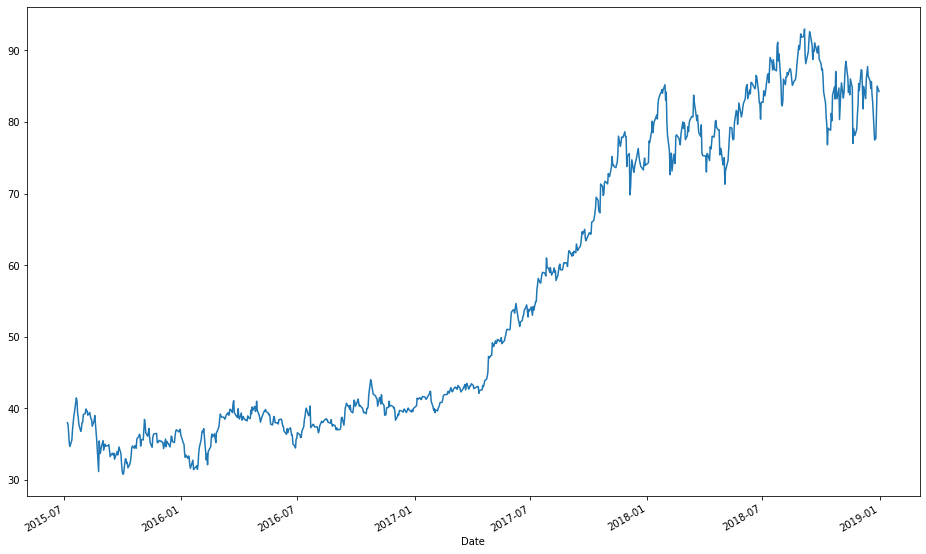

In [131]:
traindf['Open'].plot()

In [91]:
traindf.rolling(7).mean().head(30)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-09,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-10,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-13,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-14,37.124286,35.228571,36.342857,35.847142,5.589357e+06,35.847142
2015-07-15,36.902858,35.375714,36.340000,35.961428,6.618814e+06,35.961428
2015-07-16,37.211429,35.672857,36.497143,36.248571,8.617314e+06,36.248571


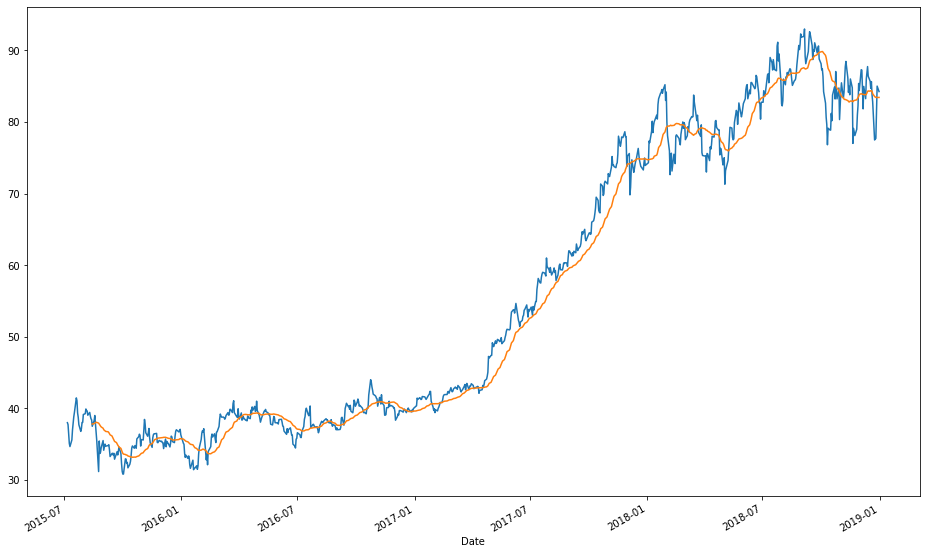

In [132]:
traindf['Open'].plot()
traindf.rolling(window = 30).mean()['Close'].plot()

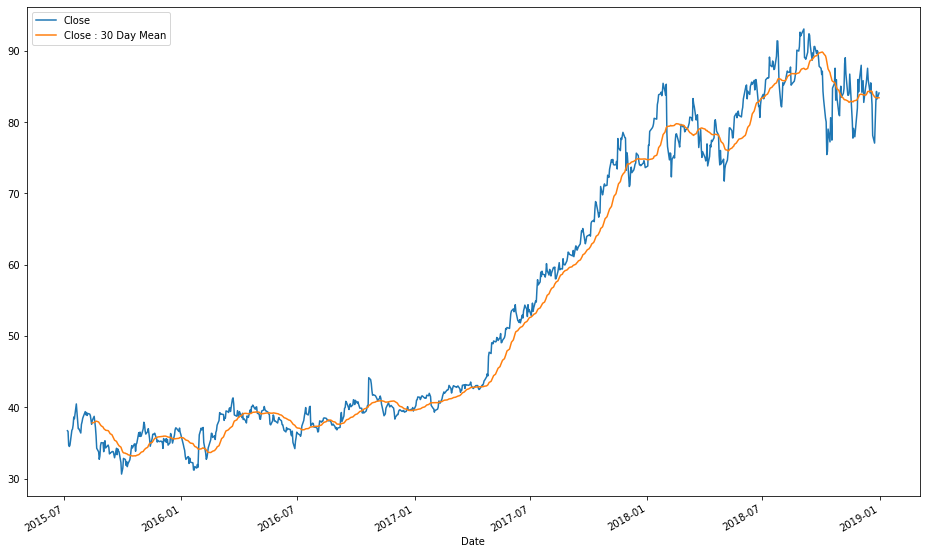

In [133]:
traindf['Close : 30 Day Mean'] = traindf['Close'].rolling(window = 30).mean()
traindf[['Close', 'Close : 30 Day Mean']].plot()

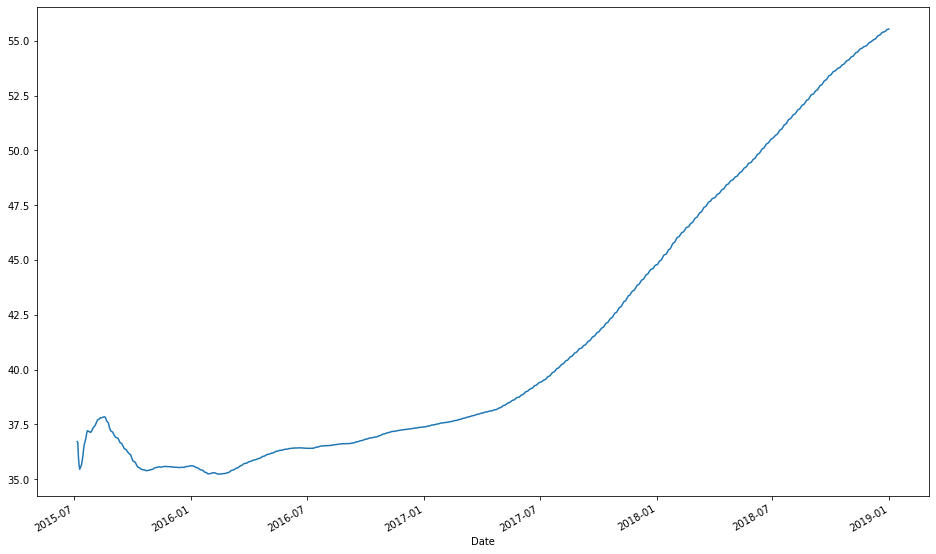

In [134]:
traindf['Close'].expanding(min_periods = 1).mean().plot()

In [95]:
trainsetdf = traindf['Open']
trainsetdf = pd.DataFrame(trainsetdf)

In [96]:
traindf.isna().any()

High                   False
Low                    False
Open                   False
Close                  False
Volume                 False
Adj Close              False
Close : 30 Day Mean     True
dtype: bool

In [97]:
sc = MinMaxScaler(feature_range = (0, 1))
trainsetdf_scaled = sc.fit_transform(trainsetdf)

In [98]:
X_train = []
y_train = []
for i in range(60, 880) : 
    X_train.append(trainsetdf_scaled[i-60:i, 0])
    y_train.append(trainsetdf_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [99]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [100]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
26/26 [==============================] - 3s 103ms/step - loss: 0.0486
Epoch 2/100
26/26 [==============================] - 3s 107ms/step - loss: 0.0076
Epoch 3/100
26/26 [==============================] - 3s 103ms/step - loss: 0.0047
Epoch 4/100
26/26 [==============================] - 3s 107ms/step - loss: 0.0058
Epoch 5/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0052
Epoch 6/100
26/26 [==============================] - 3s 103ms/step - loss: 0.0047
Epoch 7/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0046
Epoch 8/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0041
Epoch 9/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0044
Epoch 10/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0045
Epoch 11/100
26/26 [==============================] - 3s 105ms/step - loss: 0.0039
Epoch 12/100
26/26 [==============================] - 3s 104ms/step - loss: 0.0036
Epoch 13/100


In [127]:
real_stock_price = testdf.iloc[:, 1:2].values

In [110]:
testdf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,86.199997,82.239998,82.379997,85.750000,10146200,85.750000
2019-01-03,84.750000,81.910004,84.360001,82.089996,9650700,82.089996
2019-01-04,86.910004,83.370003,83.709999,86.269997,9234800,86.269997
2019-01-07,87.550003,86.019997,86.419998,86.930000,11094100,86.930000
2019-01-08,88.894997,87.690002,88.110001,88.699997,8307600,88.699997


In [111]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 463 entries, 2019-01-02 to 2020-10-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       463 non-null    float64
 1   Low        463 non-null    float64
 2   Open       463 non-null    float64
 3   Close      463 non-null    float64
 4   Volume     463 non-null    int64  
 5   Adj Close  463 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 25.3 KB


In [112]:
testsetdf = testdf['Open']
testsetdf = pd.DataFrame(testsetdf)

In [113]:
testsetdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 463 entries, 2019-01-02 to 2020-10-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    463 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [114]:
totaldf = pd.concat((traindf['Open'], testdf['Open']), axis = 0)
inputs = totaldf[len(totaldf) - len(testdf) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(250, 500) : 
  X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [115]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       250 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


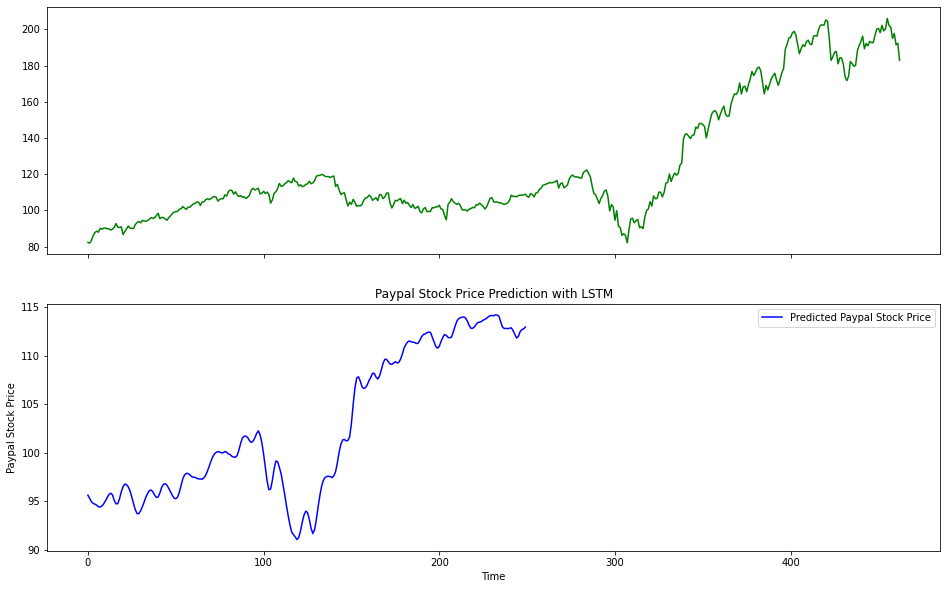

In [136]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
ax1.plot(real_stock_price, color = 'green', label = 'Real Paypal Stock Price')
ax2.plot(predicted_stock_price, color = 'blue', label = 'Predicted Paypal Stock Price')
plt.title('Paypal Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Paypal Stock Price')
plt.legend()
plt.show()